In [69]:
# 이미지 읽어서 데이터 준비하기

In [118]:
###########################
# 라이브러리 로딩
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
 
###########################
# 이미지 읽어서 데이터 준비하기
# paths = glob.glob(C:/Users/hs\Desktop/khs/notMNIST_small)
# paths = open('C:/Users/hs\Desktop/khs/notMNIST_smal')
paths = glob.glob('C:/Users/hs/Desktop/khs/notMNIST_small/notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
print([paths[1].split('/')[-1]])
print([paths[1].split('/')[-1][15]])
종속 = np.array([paths[i].split('/')[-1][15] for i in range(len(paths))])
print(독립.shape, 종속.shape)

['notMNIST_small\\A\\QmV0dGVyIE9mZiAxLnR0Zg==.png']
['A']
(18724, 28, 28) (18724,)


In [119]:
종속[0:2]

array(['J', 'A'], dtype='<U1')

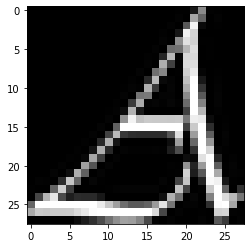

In [128]:
plt.imshow(독립[1], cmap='gray')

In [122]:
import pandas as pd
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [123]:
###########################
# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[28, 28, 1])
 
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
 
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [124]:
###########################
# 모델을 학습
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 7s 12ms/step - loss: 0.5125 - accuracy: 0.8510
Epoch 2/10
586/586 [==============================] - 7s 12ms/step - loss: 0.2681 - accuracy: 0.9190
Epoch 3/10
586/586 [==============================] - 7s 12ms/step - loss: 0.2149 - accuracy: 0.9361
Epoch 4/10
586/586 [==============================] - 7s 12ms/step - loss: 0.1822 - accuracy: 0.9441
Epoch 5/10
586/586 [==============================] - 8s 14ms/step - loss: 0.1537 - accuracy: 0.9523
Epoch 6/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1316 - accuracy: 0.9582
Epoch 7/10
586/586 [==============================] - 10s 17ms/step - loss: 0.1114 - accuracy: 0.9645
Epoch 8/10
586/586 [==============================] - 9s 15ms/step - loss: 0.0943 - accuracy: 0.9693
Epoch 9/10
586/586 [==============================] - 9s 15ms/step - loss: 0.0792 - accuracy: 0.9742
Epoch 10/10
586/586 [==============================] - 9s 15ms/step - loss: 0.0646 - accur

In [125]:
###########################
# 모델을 이용합니다. 
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00
1,1.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.00,0.00,0.00
4,0.0,0.11,0.0,0.0,0.19,0.06,0.19,0.11,0.22,0.11


In [126]:
# 정답 확인
종속[0:5]

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0


In [127]:
# 모델 확인
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)             